# Examples of power spectra, C_ell's and correlations with Modified Gravity (MG) parameters that depend on redshift and scale 

Importing packages and setting up cosmological parameters beside MG parameters

In [1]:
import numpy as np
import pyccl as ccl
import pylab as plt
import math
%matplotlib inline

In [2]:
Omega_c = 0.25; Omega_b = 0.05; h = 0.7; A_s = 2.1e-9;
n_s = 0.96; Neff = 3.046; m_nu = 0.

Parameter arrays for MG parameters today 

In [3]:
mu_0 = [0.2, -0.2]
sigma_0 = [0.2, -0.2]

## Setting five cosmologies: GR and four MG models following the paramterization described in for example: P. A. R. Ade, others, and (Planck Collaboration), Astron. Astrophys. 594, A14 (2016), 1502.01590. For mu(a,k) and Sigma(a,k) with: mu_0, Sigma_0, and c_1, c_2, and lambda_mg to parametrize the scale dependence 

In [4]:
cosmo_GR_C = ccl.Cosmology(Omega_c = Omega_c, Omega_b = Omega_b,
                         h = h, A_s = A_s, n_s = n_s, Neff = Neff,
                         m_nu = m_nu, matter_power_spectrum='linear',transfer_function='boltzmann_isitgr')

cosmo_1_C = ccl.Cosmology(Omega_c = Omega_c, Omega_b = Omega_b, 
                        h = h, A_s = A_s, n_s = n_s, Neff = Neff,
                        m_nu = m_nu, mu_0 = mu_0[0], sigma_0 = sigma_0[0],
                        c1_mg = 2, c2_mg = 2, lambda_mg = 1,
                        matter_power_spectrum='linear',transfer_function='boltzmann_isitgr')

cosmo_2_C = ccl.Cosmology(Omega_c = Omega_c, Omega_b = Omega_b, h = h,
                        A_s = A_s, n_s = n_s, Neff = Neff,
                        m_nu = m_nu, mu_0 = mu_0[1], sigma_0 = sigma_0[1], 
                        c1_mg = 2, c2_mg = 2, lambda_mg = 1,
                        matter_power_spectrum='linear',transfer_function='boltzmann_isitgr')

cosmo_3_C = ccl.Cosmology(Omega_c = Omega_c, Omega_b = Omega_b, 
                        h = h, A_s = A_s, n_s = n_s, Neff = Neff,
                        m_nu = m_nu, mu_0 = mu_0[0], sigma_0 = sigma_0[0],
                        c1_mg = -2, c2_mg = -2, lambda_mg = 1,
                        matter_power_spectrum='linear',transfer_function='boltzmann_isitgr')

cosmo_4_C = ccl.Cosmology(Omega_c = Omega_c, Omega_b = Omega_b, h = h,
                        A_s = A_s, n_s = n_s, Neff = Neff,
                        m_nu = m_nu, mu_0 = mu_0[1], sigma_0 = sigma_0[1], 
                        c1_mg = -2, c2_mg = -2, lambda_mg = 1,
                        matter_power_spectrum='linear',transfer_function='boltzmann_isitgr')

## MG scale-dependence in the matter power spectrum

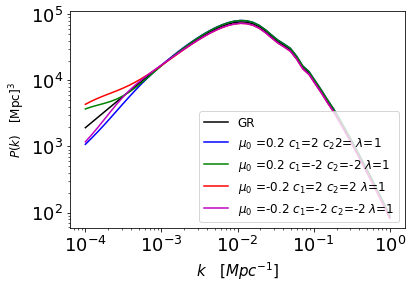

In [5]:
k = np.logspace(-4, 0) # 1 / Mpc units

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

Pk_GR_C = ccl.linear_matter_power(cosmo_GR_C, k, a=1.)
Pk_1_C = ccl.linear_matter_power(cosmo_1_C, k, a=1.)
Pk_2_C = ccl.linear_matter_power(cosmo_2_C, k, a=1.)
Pk_3_C = ccl.linear_matter_power(cosmo_3_C, k, a=1.)
Pk_4_C = ccl.linear_matter_power(cosmo_4_C, k, a=1.)

plt.loglog(k, Pk_GR_C, 'k', label='GR')
plt.loglog(k, Pk_1_C, 'b', label='$\mu_0$ ='+str(mu_0[0])+' $c_1$=2'+' $c_2$2='+' $\lambda$=1')
plt.loglog(k, Pk_3_C, 'g', label='$\mu_0$ ='+str(mu_0[0])+' $c_1$=-2'+' $c_2$=-2'+' $\lambda$=1')
plt.loglog(k, Pk_2_C, 'r', label='$\mu_0$ ='+str(mu_0[1])+' $c_1$=2'+' $c_2$=2'+' $\lambda$=1')
plt.loglog(k, Pk_4_C, 'm', label='$\mu_0$ ='+str(mu_0[1])+' $c_1$=-2'+' $c_2$=-2'+' $\lambda$=1')

plt.xlabel('$k\quad[Mpc^{-1}]$', fontsize = 15)
plt.ylabel('$P(k)\quad[{\\rm Mpc}]^3$', fontsize=12)
plt.legend(fontsize=12, loc='lower right')

plt.show()

## Weak Lensing C_ell's

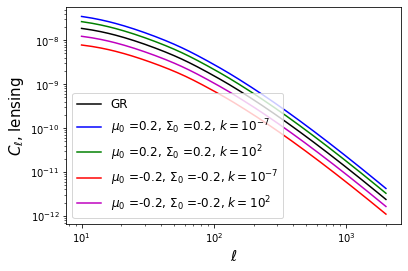

In [7]:
# Redshift array
z = np.linspace(0., 3., 600)
# Number density input
n = np.exp(-((z-0.5)/0.1)**2)
        
# ell range input
ell = np.arange(10, 2000)
     
# ClTracer objects

lens_GR_C = ccl.WeakLensingTracer(cosmo_GR_C, dndz=(z,n))
lens_1_C = ccl.WeakLensingTracer(cosmo_1_C, dndz=(z,n), k=1e-7)
lens_2_C = ccl.WeakLensingTracer(cosmo_2_C, dndz=(z,n), k=1e-7)
lens_3_C = ccl.WeakLensingTracer(cosmo_1_C, dndz=(z,n), k=1e2)
lens_4_C = ccl.WeakLensingTracer(cosmo_2_C, dndz=(z,n), k=1e2)

Cl_lensing_GR_C = ccl.angular_cl(cosmo_GR_C, lens_GR_C, lens_GR_C, ell)
Cl_lensing_1_C = ccl.angular_cl(cosmo_1_C, lens_1_C, lens_1_C, ell)
Cl_lensing_2_C = ccl.angular_cl(cosmo_2_C, lens_2_C, lens_2_C, ell)
Cl_lensing_3_C = ccl.angular_cl(cosmo_1_C, lens_3_C, lens_3_C, ell)
Cl_lensing_4_C = ccl.angular_cl(cosmo_2_C, lens_4_C, lens_4_C, ell)

plt.figure()
plt.loglog(ell, Cl_lensing_GR_C, 'k', label='GR')
plt.loglog(ell, Cl_lensing_1_C, 'b', 
           label='$\mu_0$ ='+str(mu_0[0])+', $\Sigma_0$ =' + str(sigma_0[0])+', $k =10^{-7}$')
plt.loglog(ell, Cl_lensing_3_C, 'g', 
           label='$\mu_0$ ='+str(mu_0[0])+', $\Sigma_0$ =' + str(sigma_0[0])+', $k =10^{2}$')
plt.loglog(ell, Cl_lensing_2_C, 'r', 
           label='$\mu_0$ ='+str(mu_0[1])+', $\Sigma_0$ =' + str(sigma_0[1])+', $k =10^{-7}$')

plt.loglog(ell, Cl_lensing_4_C, 'm', 
           label='$\mu_0$ ='+str(mu_0[1])+', $\Sigma_0$ =' + str(sigma_0[1])+', $k =10^{2}$')

plt.xlabel('$\ell$', fontsize=15)
plt.ylabel('$C_\ell$, lensing', fontsize=15)
plt.legend(fontsize=12)
plt.show()

## CMB Lensing C_ell's 

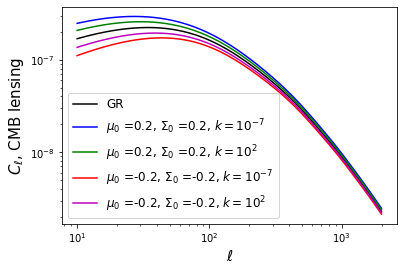

In [8]:
# Cl Tracer objects
cmbl_GR_C = ccl.CMBLensingTracer(cosmo_GR_C,1089.)
cmbl_1_C = ccl.CMBLensingTracer(cosmo_1_C,1089., k=1e-7)
cmbl_2_C = ccl.CMBLensingTracer(cosmo_2_C,1089., k=1e-7)
cmbl_3_C = ccl.CMBLensingTracer(cosmo_1_C,1089., k=1e2)
cmbl_4_C = ccl.CMBLensingTracer(cosmo_2_C,1089., k=1e2)

Cl_cmb_GR_C = ccl.angular_cl(cosmo_GR_C, cmbl_GR_C, cmbl_GR_C, ell)
Cl_cmb_1_C = ccl.angular_cl(cosmo_1_C, cmbl_1_C, cmbl_1_C, ell)
Cl_cmb_2_C = ccl.angular_cl(cosmo_2_C, cmbl_2_C, cmbl_2_C, ell)
Cl_cmb_3_C = ccl.angular_cl(cosmo_1_C, cmbl_3_C, cmbl_3_C, ell)
Cl_cmb_4_C = ccl.angular_cl(cosmo_2_C, cmbl_4_C, cmbl_4_C, ell)

plt.figure()
plt.loglog(ell, Cl_cmb_GR_C, 'k', label='GR')
plt.loglog(ell, Cl_cmb_1_C, 'b', 
           label='$\mu_0$ ='+str(mu_0[0])+', $\Sigma_0$ =' + str(sigma_0[0])+', $k =10^{-7}$')
plt.loglog(ell, Cl_cmb_3_C, 'g', 
           label='$\mu_0$ ='+str(mu_0[0])+', $\Sigma_0$ =' + str(sigma_0[0])+', $k =10^{2}$')
plt.loglog(ell, Cl_cmb_2_C, 'r', 
           label='$\mu_0$ ='+str(mu_0[1])+', $\Sigma_0$ =' + str(sigma_0[1])+', $k =10^{-7}$')
plt.loglog(ell, Cl_cmb_4_C, 'm', 
           label='$\mu_0$ ='+str(mu_0[1])+', $\Sigma_0$ =' + str(sigma_0[1])+', $k =10^{2}$')
plt.xlabel('$\ell$', fontsize=15)
plt.ylabel('$C_\ell$, CMB lensing', fontsize=15)
plt.legend(fontsize=12)
plt.show()

##  Weak Lensing Correlations 

/home/mishak/DEV/CCL/pyccl/correlation.py:83: CCLWarning: corr_type is deprecated. Use type = GG+
  CCLWarning)
/home/mishak/DEV/CCL/pyccl/correlation.py:83: CCLWarning: corr_type is deprecated. Use type = GG-
  CCLWarning)


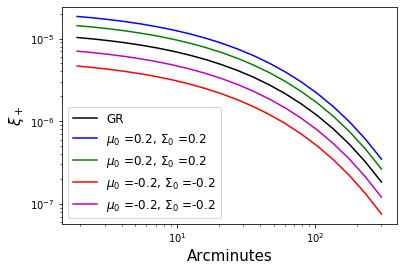

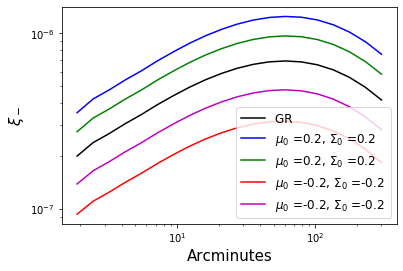

In [9]:
theta = np.logspace(-1.5, np.log10(5), 20) # In degrees

xi_p_GR_C = ccl.correlation(cosmo_GR_C, ell, Cl_lensing_GR_C, theta, 
                          corr_type='L+', method='fftlog')
xi_p_1_C = ccl.correlation(cosmo_1_C, ell, Cl_lensing_1_C, theta, 
                          corr_type='L+', method='fftlog')
xi_p_2_C = ccl.correlation(cosmo_2_C, ell, Cl_lensing_2_C, theta, 
                          corr_type='L+', method='fftlog')
xi_p_3_C = ccl.correlation(cosmo_1_C, ell, Cl_lensing_3_C, theta, 
                          corr_type='L+', method='fftlog')
xi_p_4_C = ccl.correlation(cosmo_2_C, ell, Cl_lensing_4_C, theta, 
                          corr_type='L+', method='fftlog')


xi_m_GR_C = ccl.correlation(cosmo_GR_C, ell, Cl_lensing_GR_C, theta,
                         corr_type='L-', method='fftlog')
xi_m_1_C = ccl.correlation(cosmo_1_C, ell, Cl_lensing_1_C, theta,
                         corr_type='L-', method='fftlog')
xi_m_2_C = ccl.correlation(cosmo_2_C, ell, Cl_lensing_2_C, theta, 
                         corr_type='L-', method='fftlog')
xi_m_3_C = ccl.correlation(cosmo_1_C, ell, Cl_lensing_3_C, theta,
                         corr_type='L-', method='fftlog')
xi_m_4_C = ccl.correlation(cosmo_2_C, ell, Cl_lensing_4_C, theta, 
                         corr_type='L-', method='fftlog')

theta_amin = theta * 60. # In arcminutes.

plt.figure()
plt.loglog(theta_amin, xi_p_GR_C, 'k', label='GR')
plt.loglog(theta_amin, xi_p_1_C, 'b', 
           label='$\mu_0$ ='+str(mu_0[0])+', $\Sigma_0$ =' + str(sigma_0[0])+"")
plt.loglog(theta_amin, xi_p_3_C, 'g', 
           label='$\mu_0$ ='+str(mu_0[0])+', $\Sigma_0$ =' + str(sigma_0[0])+"")
plt.loglog(theta_amin, xi_p_2_C, 'r', 
           label='$\mu_0$ ='+str(mu_0[1])+', $\Sigma_0$ =' + str(sigma_0[1])+"")
plt.loglog(theta_amin, xi_p_4_C, 'm', 
           label='$\mu_0$ ='+str(mu_0[1])+', $\Sigma_0$ =' + str(sigma_0[1])+"")
plt.legend(fontsize=12)
plt.xlabel('Arcminutes', fontsize = 15)
plt.ylabel('$\\xi_+$', fontsize=15)
plt.show()

plt.figure()
plt.loglog(theta_amin, xi_m_GR_C, 'k', label='GR ')
plt.loglog(theta_amin, xi_m_1_C, 'b', 
           label='$\mu_0$ ='+str(mu_0[0])+', $\Sigma_0$ =' + str(sigma_0[0])+" ")
plt.loglog(theta_amin, xi_m_3_C, 'g', 
           label='$\mu_0$ ='+str(mu_0[0])+', $\Sigma_0$ =' + str(sigma_0[0])+" ")
plt.loglog(theta_amin, xi_m_2_C, 'r', 
           label='$\mu_0$ ='+str(mu_0[1])+', $\Sigma_0$ =' + str(sigma_0[1])+" ")
plt.loglog(theta_amin, xi_m_4_C, 'm', 
           label='$\mu_0$ ='+str(mu_0[1])+', $\Sigma_0$ =' + str(sigma_0[1])+" ")
plt.legend(fontsize=12)
plt.xlabel('Arcminutes', fontsize = 15)
plt.ylabel('$\\xi_-$', fontsize=15)
plt.show()

## Weak Lensing C_ell's with MG parameter k dependance specified by a k-array

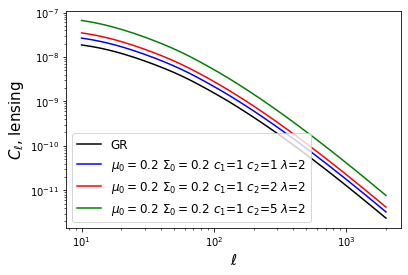

In [12]:
cosmo_GR_C = ccl.Cosmology(Omega_c = Omega_c, Omega_b = Omega_b,
                         h = h, A_s = A_s, n_s = n_s, Neff = Neff,
                         m_nu = m_nu, matter_power_spectrum='linear',transfer_function='boltzmann_isitgr')

cosmo_1_C = ccl.Cosmology(Omega_c = Omega_c, Omega_b = Omega_b, 
                        h = h, A_s = A_s, n_s = n_s, Neff = Neff,
                        m_nu = m_nu, mu_0 = 0.2, sigma_0 = 0.2,
                        c1_mg = 1, c2_mg = 1, lambda_mg = 2,
                        matter_power_spectrum='linear',transfer_function='boltzmann_isitgr')
cosmo_2_C = ccl.Cosmology(Omega_c = Omega_c, Omega_b = Omega_b, 
                        h = h, A_s = A_s, n_s = n_s, Neff = Neff,
                        m_nu = m_nu, mu_0 = 0.2, sigma_0 = 0.2,
                        c1_mg = 1, c2_mg = 2, lambda_mg = 2,
                        matter_power_spectrum='linear',transfer_function='boltzmann_isitgr')
cosmo_3_C = ccl.Cosmology(Omega_c = Omega_c, Omega_b = Omega_b, 
                        h = h, A_s = A_s, n_s = n_s, Neff = Neff,
                        m_nu = m_nu, mu_0 = 0.2, sigma_0 = 0.2,
                        c1_mg = 1, c2_mg = 5, lambda_mg = 2,
                        matter_power_spectrum='linear',transfer_function='boltzmann_isitgr')

# Redshift array
z = np.linspace(0., 3., 600)
# Number density input
n = np.exp(-((z-0.5)/0.1)**2)
        
# ell range input
ell = np.arange(10, 2000)
     
# k-array
k_array = np.linspace(1e-10,1e-5, 500)  # 

lens_GR_C = ccl.WeakLensingTracer(cosmo_GR_C, dndz=(z,n))
lens_1_C = ccl.WeakLensingTracer(cosmo_1_C, dndz=(z,n), k=k_array)
lens_2_C = ccl.WeakLensingTracer(cosmo_2_C, dndz=(z,n), k=k_array)
lens_3_C = ccl.WeakLensingTracer(cosmo_3_C, dndz=(z,n), k=k_array)

Cl_lensing_GR_C = ccl.angular_cl(cosmo_GR_C, lens_GR_C, lens_GR_C, ell)
Cl_lensing_1_C = ccl.angular_cl(cosmo_1_C, lens_1_C, lens_1_C, ell)
Cl_lensing_2_C = ccl.angular_cl(cosmo_2_C, lens_2_C, lens_2_C, ell)
Cl_lensing_3_C = ccl.angular_cl(cosmo_3_C, lens_3_C, lens_3_C, ell)

plt.figure()
plt.loglog(ell, Cl_lensing_GR_C, 'k', label='GR')
plt.loglog(ell, Cl_lensing_1_C, 'b', 
           label='$\mu_0=0.2$' + ' $\Sigma_0=0.2$' + ' $c_1$=1'+' $c_2$=1'+' $\lambda$=2')
plt.loglog(ell, Cl_lensing_2_C, 'r', 
           label='$\mu_0=0.2$' + ' $\Sigma_0=0.2$' + ' $c_1$=1'+' $c_2$=2'+' $\lambda$=2')
plt.loglog(ell, Cl_lensing_3_C, 'g', 
           label='$\mu_0=0.2$' + ' $\Sigma_0=0.2$' + ' $c_1$=1'+' $c_2$=5'+' $\lambda$=2')

plt.xlabel('$\ell$', fontsize=15)
plt.ylabel('$C_\ell$, lensing', fontsize=15)
plt.legend(fontsize=12)
plt.show()

/home/mishak/DEV/CCL/pyccl/correlation.py:83: CCLWarning: corr_type is deprecated. Use type = GG+
  CCLWarning)
/home/mishak/DEV/CCL/pyccl/correlation.py:83: CCLWarning: corr_type is deprecated. Use type = GG-
  CCLWarning)


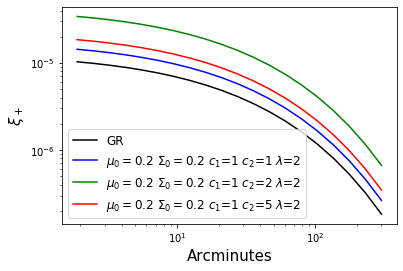

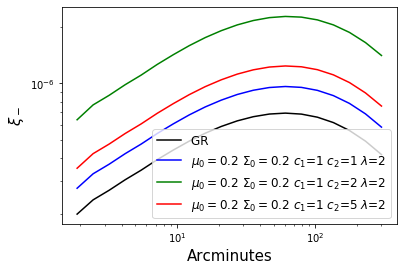

In [13]:
theta = np.logspace(-1.5, np.log10(5), 20) # In degrees

xi_p_GR_C = ccl.correlation(cosmo_GR_C, ell, Cl_lensing_GR_C, theta, 
                          corr_type='L+', method='fftlog')
xi_p_1_C = ccl.correlation(cosmo_1_C, ell, Cl_lensing_1_C, theta, 
                          corr_type='L+', method='fftlog')
xi_p_2_C = ccl.correlation(cosmo_2_C, ell, Cl_lensing_2_C, theta, 
                          corr_type='L+', method='fftlog')
xi_p_3_C = ccl.correlation(cosmo_1_C, ell, Cl_lensing_3_C, theta, 
                          corr_type='L+', method='fftlog')

xi_m_GR_C = ccl.correlation(cosmo_GR_C, ell, Cl_lensing_GR_C, theta,
                         corr_type='L-', method='fftlog')
xi_m_1_C = ccl.correlation(cosmo_1_C, ell, Cl_lensing_1_C, theta,
                         corr_type='L-', method='fftlog')
xi_m_2_C = ccl.correlation(cosmo_2_C, ell, Cl_lensing_2_C, theta, 
                         corr_type='L-', method='fftlog')
xi_m_3_C = ccl.correlation(cosmo_1_C, ell, Cl_lensing_3_C, theta,
                         corr_type='L-', method='fftlog')
theta_amin = theta * 60. # In arcminutes.

plt.figure()
plt.loglog(theta_amin, xi_p_GR_C, 'k', label='GR')
plt.loglog(theta_amin, xi_p_1_C, 'b', 
           label='$\mu_0=0.2$' + ' $\Sigma_0=0.2$' + ' $c_1$=1'+' $c_2$=1'+' $\lambda$=2')
plt.loglog(theta_amin, xi_p_3_C, 'g', 
           label='$\mu_0=0.2$' + ' $\Sigma_0=0.2$' + ' $c_1$=1'+' $c_2$=2'+' $\lambda$=2')
plt.loglog(theta_amin, xi_p_2_C, 'r', 
           label='$\mu_0=0.2$' + ' $\Sigma_0=0.2$' + ' $c_1$=1'+' $c_2$=5'+' $\lambda$=2')

plt.legend(fontsize=12)
plt.xlabel('Arcminutes', fontsize = 15)
plt.ylabel('$\\xi_+$', fontsize=15)
plt.show()

plt.figure()
plt.loglog(theta_amin, xi_m_GR_C, 'k', label='GR ')
plt.loglog(theta_amin, xi_m_1_C, 'b', 
           label='$\mu_0=0.2$' + ' $\Sigma_0=0.2$' + ' $c_1$=1'+' $c_2$=1'+' $\lambda$=2')
plt.loglog(theta_amin, xi_m_3_C, 'g', 
           label='$\mu_0=0.2$' + ' $\Sigma_0=0.2$' + ' $c_1$=1'+' $c_2$=2'+' $\lambda$=2')
plt.loglog(theta_amin, xi_m_2_C, 'r', 
           label='$\mu_0=0.2$' + ' $\Sigma_0=0.2$' + ' $c_1$=1'+' $c_2$=5'+' $\lambda$=2')
plt.legend(fontsize=12)
plt.xlabel('Arcminutes', fontsize = 15)
plt.ylabel('$\\xi_-$', fontsize=15)
plt.show()

## CMB Lensing C_ell's with MG parameter k dependance specified by a k-array

In [ ]:
# Cl Tracer objects
cmbl_GR_C = ccl.CMBLensingTracer(cosmo_GR_C,1089.)
cmbl_1_C = ccl.CMBLensingTracer(cosmo_1_C,1089., k_MG=k_array)
cmbl_2_C = ccl.CMBLensingTracer(cosmo_2_C,1089., k_MG=k_array)
cmbl_3_C = ccl.CMBLensingTracer(cosmo_1_C,1089., k_MG=k_array)

Cl_cmb_GR_C = ccl.angular_cl(cosmo_GR_C, cmbl_GR_C, cmbl_GR_C, ell)
Cl_cmb_1_C = ccl.angular_cl(cosmo_1_C, cmbl_1_C, cmbl_1_C, ell)
Cl_cmb_2_C = ccl.angular_cl(cosmo_2_C, cmbl_2_C, cmbl_2_C, ell)
Cl_cmb_3_C = ccl.angular_cl(cosmo_1_C, cmbl_3_C, cmbl_3_C, ell)


plt.figure()
plt.loglog(ell, Cl_cmb_GR_C, 'k', label='GR')
plt.loglog(ell, Cl_cmb_1_C, 'b', 
           label='$\mu_0=0.2$' + ' $\Sigma_0=0.2$' + ' $c_1$=1'+' $c_2$=1'+' $\lambda$=2')
plt.loglog(ell, Cl_cmb_3_C, 'g', 
           label='$\mu_0=0.2$' + ' $\Sigma_0=0.2$' + ' $c_1$=1'+' $c_2$=2'+' $\lambda$=2')
plt.loglog(ell, Cl_cmb_2_C, 'r', 
           label='$\mu_0=0.2$' + ' $\Sigma_0=0.2$' + ' $c_1$=1'+' $c_2$=3'+' $\lambda$=2')
plt.xlabel('$\ell$', fontsize=15)
plt.ylabel('$C_\ell$, CMB lensing', fontsize=15)
plt.legend(fontsize=12)
plt.show()

## MG with redshift and k dependence as well as an intrinsic alignment bias function

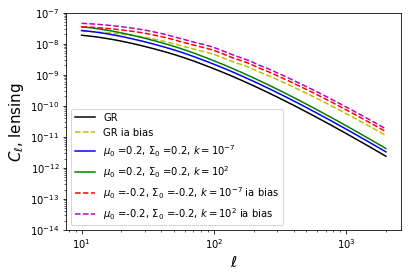

In [17]:
# Redshift array
z = np.linspace(0., 3., 600)
bias_ia = 5*np.ones_like(z) #A_IA=1 in the NLA model

# Number density input
n = np.exp(-((z-0.5)/0.1)**2)
        
# ell range input
ell = np.arange(10, 2000)
     
# ClTracer objects

lens_GR_C = ccl.WeakLensingTracer(cosmo_GR_C, dndz=(z,n))
lens_GR2_C = ccl.WeakLensingTracer(cosmo_GR_C, dndz=(z,n), ia_bias = (z,bias_ia))
lens_1_C = ccl.WeakLensingTracer(cosmo_1_C, dndz=(z,n), k =1e-7)
lens_2_C = ccl.WeakLensingTracer(cosmo_1_C, dndz=(z,n), ia_bias = (z,bias_ia), k =1e-7)
lens_3_C = ccl.WeakLensingTracer(cosmo_2_C, dndz=(z,n), k =1e-7)
lens_4_C = ccl.WeakLensingTracer(cosmo_2_C, dndz=(z,n), ia_bias = (z,bias_ia), k =1e-7)

Cl_lensing_GR_C = ccl.angular_cl(cosmo_GR_C, lens_GR_C, lens_GR_C, ell)
Cl_lensing_GR2_C = ccl.angular_cl(cosmo_GR_C, lens_GR2_C, lens_GR2_C, ell)
Cl_lensing_1_C = ccl.angular_cl(cosmo_1_C, lens_1_C, lens_1_C, ell)
Cl_lensing_2_C = ccl.angular_cl(cosmo_1_C, lens_2_C, lens_2_C, ell)
Cl_lensing_3_C = ccl.angular_cl(cosmo_2_C, lens_3_C, lens_3_C, ell)
Cl_lensing_4_C = ccl.angular_cl(cosmo_2_C, lens_4_C, lens_4_C, ell)

plt.figure()
plt.loglog(ell, Cl_lensing_GR_C, 'k', label='GR')
plt.loglog(ell, Cl_lensing_GR2_C, '--y', label='GR'+' ia bias')
plt.loglog(ell, Cl_lensing_1_C, 'b', 
          label='$\mu_0$ ='+str(mu_0[0])+', $\Sigma_0$ =' + str(sigma_0[0])+', $k =10^{-7}$')
plt.loglog(ell, Cl_lensing_3_C, 'g', 
          label='$\mu_0$ ='+str(mu_0[0])+', $\Sigma_0$ =' + str(sigma_0[0])+', $k =10^{2}$')
plt.loglog(ell, Cl_lensing_2_C, '--r', 
          label='$\mu_0$ ='+str(mu_0[1])+', $\Sigma_0$ =' + str(sigma_0[1])+', $k =10^{-7}$'+' ia bias')
plt.loglog(ell, Cl_lensing_4_C, '--m', 
           label='$\mu_0$ ='+str(mu_0[1])+', $\Sigma_0$ =' + str(sigma_0[1])+', $k =10^{2}$'+' ia bias')

plt.xlabel('$\ell$', fontsize=15)
plt.ylabel('$C_\ell$, lensing', fontsize=15)
plt.legend(fontsize=10)
plt.ylim([1e-14,1e-7])
plt.show()

## MG with redshift and k (array) dependence as well as an intrinsic alignment bias function

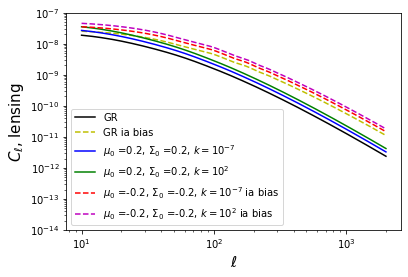

In [19]:
# Redshift array
z = np.linspace(0., 3., 600)
bias_ia = 5*np.ones_like(z) #A_IA=1 in the NLA model

# Number density input
n = np.exp(-((z-0.5)/0.1)**2)
        
# ell range input
ell = np.arange(10, 2000)
     
# ClTracer objects

lens_GR_C = ccl.WeakLensingTracer(cosmo_GR_C, dndz=(z,n))
lens_GR2_C = ccl.WeakLensingTracer(cosmo_GR_C, dndz=(z,n), ia_bias = (z,bias_ia))
lens_1_C = ccl.WeakLensingTracer(cosmo_1_C, dndz=(z,n), k = k_array)
lens_2_C = ccl.WeakLensingTracer(cosmo_1_C, dndz=(z,n), ia_bias = (z,bias_ia), k =k_array)
lens_3_C = ccl.WeakLensingTracer(cosmo_2_C, dndz=(z,n), k = 1e-7)
lens_4_C = ccl.WeakLensingTracer(cosmo_2_C, dndz=(z,n), ia_bias = (z,bias_ia), k =k_array)

Cl_lensing_GR_C = ccl.angular_cl(cosmo_GR_C, lens_GR_C, lens_GR_C, ell)
Cl_lensing_GR2_C = ccl.angular_cl(cosmo_GR_C, lens_GR2_C, lens_GR2_C, ell)
Cl_lensing_1_C = ccl.angular_cl(cosmo_1_C, lens_1_C, lens_1_C, ell)
Cl_lensing_2_C = ccl.angular_cl(cosmo_1_C, lens_2_C, lens_2_C, ell)
Cl_lensing_3_C = ccl.angular_cl(cosmo_2_C, lens_3_C, lens_3_C, ell)
Cl_lensing_4_C = ccl.angular_cl(cosmo_2_C, lens_4_C, lens_4_C, ell)

plt.figure()
plt.loglog(ell, Cl_lensing_GR_C, 'k', label='GR')
plt.loglog(ell, Cl_lensing_GR2_C, '--y', label='GR'+' ia bias')
plt.loglog(ell, Cl_lensing_1_C, 'b', 
           label='$\mu_0$ ='+str(mu_0[0])+', $\Sigma_0$ =' + str(sigma_0[0])+', $k =10^{-7}$')
plt.loglog(ell, Cl_lensing_3_C, 'g', 
           label='$\mu_0$ ='+str(mu_0[0])+', $\Sigma_0$ =' + str(sigma_0[0])+', $k =10^{2}$')
plt.loglog(ell, Cl_lensing_2_C, '--r', 
           label='$\mu_0$ ='+str(mu_0[1])+', $\Sigma_0$ =' + str(sigma_0[1])+', $k =10^{-7}$'+' ia bias')
plt.loglog(ell, Cl_lensing_4_C, '--m', 
           label='$\mu_0$ ='+str(mu_0[1])+', $\Sigma_0$ =' + str(sigma_0[1])+', $k =10^{2}$'+' ia bias')

plt.xlabel('$\ell$', fontsize=15)
plt.ylabel('$C_\ell$, lensing', fontsize=15)
plt.legend(fontsize=10)
plt.ylim([1e-14,1e-7])
plt.show()